In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
plt.rcParams['font.size'] = 14

import imp;
from IPython.core.display import HTML
css_file = 'my.css';
HTML(open(css_file, "r").read())

# Descriptive statistics

### The population

This is what it is all about. At the heart of all statistics lies the study of a **statistical population**: the set of **ALL** the **individuals** about which we want to make **inferences**. These inferences are made about one or more **random variables** of an individual. These variables are called "random" as they are numerical outcomes of a random phenomenon.

Let's say we study the expression level of a gene "geneA" in mice. The statistical population for this study consists of all mice. For these individuals we want to make inferences about the variable "expression level of geneA".

It is clear that obtaining the expression level of geneA for the full population is not possible. Nevertheless, for the sake of explanation, we will **act** as if we have access to the full population. 

The following code creates a population that consists of $N=100000$ individuals: 

In [2]:
N = 100000
geneA_population = np.random.normal(size=N,loc=0.26,scale=0.05)

We assume that the Python variable `geneA_population` contains the geneA expression levels for ALL to individuals in the population. The variable `geneA_population_mean` contains the mean of the geneA expression levels in the population.

In [3]:
print geneA_population
print "N = %i"%len(geneA_population)
geneA_population_mean = np.mean(geneA_population)
print "geneA population mean = %f"%geneA_population_mean

[0.24498095 0.21021435 0.21004233 ... 0.2973517  0.18730724 0.28563103]
N = 100000
geneA population mean = 0.259866


### The distribution

One way to describe (we are doing descriptive statistics) the expression level of geneA in the population is through a **histogram**. To construct a histogram, the first step is to bin the range of expression values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The x-axis represents the bins, the y-axis represents the counts. This forms a graphical description/representation of the **distribution** of a the geneA expression levels. The term "distribution" typically refers to the shape of the histogram as will be made clear further into the course.

We can plot a histogram of the population of geneA expression levels in Python as follows:

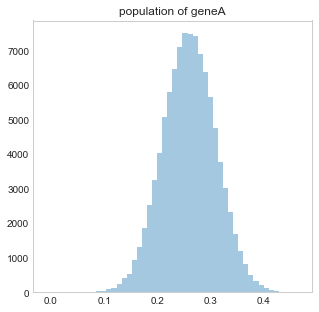

In [4]:
plt.figure(figsize=(5,5))
sns.distplot(geneA_population,kde=False)
plt.title("population of geneA")
plt.show()

This histogram provides an intuitive description of the geneA expression level. We can see the typical values for the geneA exrpression levels as well as what it means to have for instance have a high or low expression value.

The histogram reveals probabilities of ranges of the gene expression level. For instance, to get some idea of how likely it is for geneA to have an expression level equal or greater than 0.3 we can just imagine a vertical line at $x=0.3$ and consider the area to the right of this line. 

As we have access to the full population we can just count the number of individuals that have an expression level $\ge 0.3$ and divide that by the total number of individuals in the population:

In [5]:
t = 0.3
prob = float(np.sum(geneA_population>=t))/len(geneA_population)
print "p(exp_lev >= %f) = %f" % (t,prob) 

p(exp_lev >= 0.300000) = 0.212300


So the probability that the expression level of geneA is equal or greater than 0.3 is 0.21. 

We can describe the shape of a distribution through a **probability density function (PDF)**.  This a **function**  whose value at any given point on the x-axis can be interpreted as providing a relative likelihood that the value of the random variable would equal that point. 

As with the histogram the PDF is used to specify the probability of a gene expression value falling within a particular range of values. As the PDF is a continuous function this probability is given by the integral of the PDF over that range. The difference between a PDF and a histogram is that the PDF is a continuous function such that the area under the curve equals one.

The PDF of a random variable can be **estimated** by what is known as **kernel density estimation**. The PDF for our population of geneA expression values looks like this:

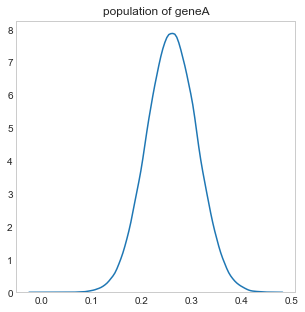

In [6]:
plt.figure(figsize=(5,5))
sns.distplot(geneA_population,hist=False)
plt.title("population of geneA")
plt.show()

The probability that geneA has an expression level equal or greater than 0.3 equals the area under the PDF for the range [0.3,0.5].

The PDF of the expression levels for geneA has a very common symmetric (bell-like) shape and is known as a **normal (or Gaussian) distribution**. The normal PDF is defined as:

$$\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

### The population parameters

From the normal PDF we learn that the shape of a normal distribution is completely defined by it's mean $\mu$ and variance $\sigma^2$. For a population $X$ that contains $N$ individuals $x_i \in X$ with $i=1 \dots N$ the mean $\mu$ is computed as

$$\mu = \frac{1}{N}\sum_{i=1}^{N}{x_i}$$

and the variance $\sigma^2$ as

$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i-\mu)^2}.$$

The variance $\sigma^2$ is a measure of spread of the population. 

A more intuitive measure of spread is the **standard deviation** $\sigma=\sqrt{\sigma^2}$. It is the distance from the mean out to either saddle point in the distribution. The saddle points on each graph are where the distribution changes from concave down to concave up. 

The following code plots three different normal (shaped) PDFs with different means and variations, they all have the same bell-like shape:

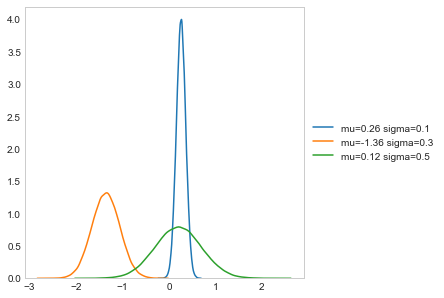

In [7]:
plt.figure(figsize=(5,5))
population = np.random.normal(size=N,loc=0.26,scale=0.1)
sns.distplot(population,hist=False,label="mu=0.26 sigma=0.1")
population = np.random.normal(size=N,loc=-1.36,scale=0.3)
sns.distplot(population,hist=False,label="mu=-1.36 sigma=0.3")
population = np.random.normal(size=N,loc=0.2,scale=0.5)
sns.distplot(population,hist=False,label="mu=0.12 sigma=0.5")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

When a random variable has a normal distribution we automatically know a few **properties** of the variable. For instance, about 68% of its values fall within one standard deviation from the mean, while 95% have a value within two standard deviations. This is shown in the figure below.

<img src="percentiles.png" width="600" />

Next to the mean and variance there are other **parameters** that describe a population. The **median** is the value separating the higher half of a probability distribution from the lower half. The **quantiles** are cutpoints dividing the range of a probability distribution into continuous intervals with equal probabilities. q-Quantiles are values that partition a finite set of values into q subsets of (nearly) equal sizes. For instance the 4-quantile (also known as the quartile) partition a finite set of values into 4 subsets of (nearly) equal sizes that each contain (nearly) 25% of the values. The first quantile is a value Q1 such that 25% of the data has a value lower than Q1, the second quantile is a value Q2 such that 50% of the data has a value lower than Q2 (this is the same as the median), etc. The difference between Q3 and Q1 is known as the **interquartile range**. The 100-quantiles are known as **percentiles** and are also shown in the figure above.

Next to the histogram there is another popular graphical description of a probability distribution called the **boxplot** (also known as a **box and whisker diagram**). As shown in the image below it is a graphical representation of the quartiles where the range of the data is shown with the assumption that every value lower then Q1-1.5xIQR or higher then Q3+1.5xIQR is considered a outlier. Boxplots are more practical when comparing the shapes of several probability distributions.

<img src="boxplot.png" width="300"/>

### The sample and uncertainty

In real live we don't have access to the full population (if we did we would not need statistics and the world would be a beautiful place for everyone). Instead we obtain a (typically small) **sample** (using one of many sampling procedures) of the population and **we use this sample to make inferences about the population**.

Consider a sample (or **dataset**) with $n=16$ humans with blue eyes (or **observations**) randomly drawn from the population:

In [8]:
n=16

# the following functions draw sample at random from a list
sample = np.random.choice(geneA_population,size=n)
print "my sample:"
print sample

my sample:
[0.2315075  0.27155178 0.2332334  0.24656168 0.23713762 0.31536127
 0.30857661 0.30001925 0.22489738 0.22211603 0.36885744 0.28352575
 0.33473973 0.19695506 0.27945127 0.22499853]


It must be noted that the formulas for the mean and variance of a sample are slightly different. For a sample $s$ that contains $n$ observations $x_i \in s$ with $i=1 \dots n$ the mean is computed as

$$\overline{x} = \frac{1}{n-1}\sum_{i=1}^{n}{x_i}$$

and the variance as

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\mu)^2}.$$

Now let's compute the mean of the population and the sample:

In [9]:
print "mean of population: %f" % geneA_population_mean
print "mean of sample: %f" % np.mean(sample) 

mean of population: 0.259866
mean of sample: 0.267468


We see that the mean of the population does not equal the mean of the sample. Even though the sample was drawn at random from this population. 

If we want to make inferences about the population using the sample we need to take into account the uncertainty that is implied by a limited sample size $n<<N$. Statistics is all about quantifying this uncertainty by making **assumptions about the population(s)** from which one or more samples are drawn.

The mean and the variance of the population are examples of a **parameter**. Parameters are summary measures of a population and as such are **fixed**.

The sample mean and variance are known as **descriptive statistics** and are **variable** summary measures of a sample. This is  illustrated by drawing 100 samples and computing the mean for each sample:

In [10]:
n=16

sample_means = []
for i in range(100):
    sample = np.random.choice(geneA_population,size=n)
    sample_means.append(np.mean(sample))

Plotting these sample means as a histogram shows that these means differ from sample to sample:

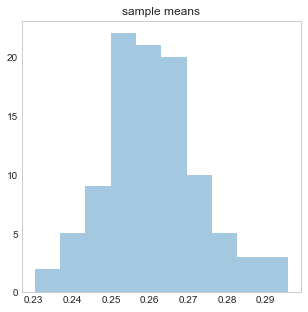

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(sample_means,kde=False,bins=10)
plt.title("sample means")
plt.show()

Notice how the shape of this distribution is again normal and the mean is close to the population mean:

In [12]:
print "mean of population: %f" % geneA_population_mean
print "mean of sample means: %f" % np.mean(sample_means)

mean of population: 0.259866
mean of sample means: 0.260986


In fact if we increase the number of samples we draw from the population the mean of the sample mean gets closer and closer to the sample mean:

In [13]:
n=16

sample_means = []
for i in range(200000):
    sample = np.random.choice(geneA_population,size=n)
    sample_means.append(np.mean(sample))
    
print "mean of population: %f" % geneA_population_mean
print "mean of sample means: %f" % np.mean(sample_means)

mean of population: 0.259866
mean of sample means: 0.259811


### The confidence interval

The sample means follow a normal distribution and also have a standard deviation: 

In [14]:
np.std(sample_means)

0.012497297776369414

Suppose we would be able to draw all possible samples with fixed sample size $n$ then the standard deviation of the sample means is known as the **standard error of the mean (SEM)** and is equal to the standard deviation of the population divided by the square root of the sample size $n$. 

As we have access to the full population we can compute the SEM as follows:

In [15]:
print "SEM using population: %f" % (np.std(geneA_population)/np.sqrt(n))

SEM using population: 0.012527


For **one sample** the SEM is estimated as:

$$SEM=\frac{s}{\sqrt{n}},$$

where $s$ is the standard deviation of the sample. Let's compute the SEM from just one sample:

In [16]:
n = 16

sample = np.random.choice(geneA_population,size=n)
print "SEM: %f" % (np.std(sample)/np.sqrt(n))

SEM: 0.011139


We can see that this is indeed close to the standard deviation of the population!!

In fact, when we look at the formula for the SEM we see that SEM gets larger as the sample variance increases. At the same time the SEM will decrease as the sample size $n$ increases. The square root is used to decrease the impact of the sample size on the SEM as $n$ increases.

The SEM is used to compute a **confidence interval (CI)** for the mean of a population. The CI is an interval of values computed from the sample that is almost sure (set by a **level of confidence**) to cover the true population value. For instance, at a level of confidence of 95% the CI of the mean of a population is an interval of values computed from a sample drawn from this population that is 95% sure to cover the true population mean.

The CI of the mean of a population is computed using a sample $x$ from the population as 

$$[\overline{x} - t^* SEM,\overline{x} + t^* SEM],$$

where $t^*$ is a **T-statistic** that follows a **t-distribution** with $n-1$ degrees of freedom. Which t-distribution to use depends on the confidence level of the CI. For now it is sufficient to understand that the value for $t^*$ depends on the level of confidence. A more intuitive explanation of what a T-statistic is will be provided later in this course.

The following code declares a Python function that computes the confidence interval for a certain confidence level given a sample $x$:

In [17]:
import scipy as sp
import scipy.stats

def CI_mean(x, confidence=0.95):
    a = 1.0*np.array(x)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

Suppose we would draw 1000 samples from the population of geneA expression levels and compute a 95% CI for each sample with the formula given above. As we have access to the full population we can compute the percentage of samples for which the CI indeed contains the population mean. This should be very close to 95%:

In [18]:
confidence = 0.95
num_samples = 1000
n = 16

num_wrong = 0
for i in range(0,num_samples):
    m,l,h = CI_mean(np.random.choice(geneA_population,size=n),confidence)
    if (l > geneA_population_mean) | (h < geneA_population_mean):
        num_wrong += 1
prob = (1. - (float(num_wrong)/num_samples))
print "Probability that population mean is within sample CI: %f" % prob

Probability that population mean is within sample CI: 0.930000


To conclude, **as long as the population is normal (these are the assumptions we make!)**, one sample can be used to quantify the uncertainty (using the CI) about the mean of the population from which the sample was drawn.